<a href="https://colab.research.google.com/github/Rukawuba/K_Means_Housing/blob/main/K_Means_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")


In [3]:
data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
data1 = data[["MedInc", "Latitude", "Longitude"]]
data1.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data1, test_size = 0.2, random_state = 25)

X_train.head()

,MedInc,Latitude,Longitude
14105,1.0617,32.75,-117.10
20250,3.2847,34.24,-119.18
5191,1.5256,33.93,-118.26
664,3.9702,37.70,-122.14
8557,4.7319,33.93,-118.40


In [8]:
#Building K-Means

from sklearn.cluster import KMeans
model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 25)
model_unsup.fit(X_train)



KMeans(n_clusters=6, n_init='auto', random_state=25)

In [10]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()




,MedInc,Latitude,Longitude,cluster
14105,1.0617,32.75,-117.10,0
20250,3.2847,34.24,-119.18,0
5191,1.5256,33.93,-118.26,0
664,3.9702,37.70,-122.14,2
8557,4.7319,33.93,-118.40,3


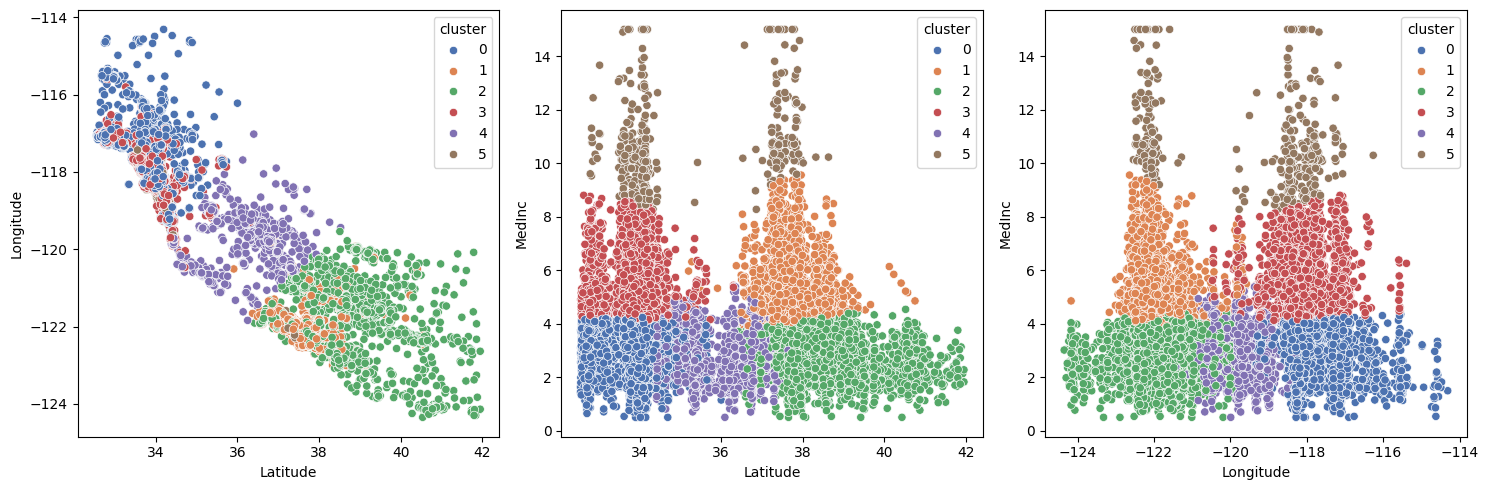

In [12]:
#plotting results

import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [13]:
#Predicting with Test Set

y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
73,0.4999,37.81,-122.29,2
8944,2.9167,34.01,-118.47,0
3737,3.4013,34.17,-118.40,0
19092,6.2040,38.24,-122.62,1
9493,3.2500,39.37,-123.75,2


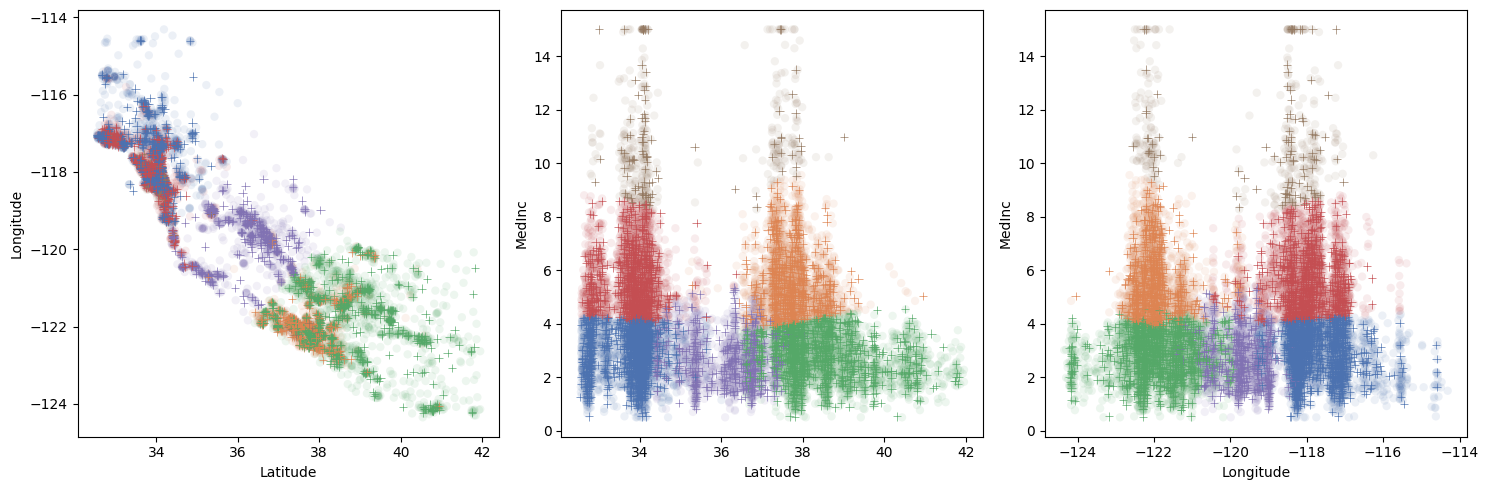

In [14]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [15]:
#training a supervised Classification model
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

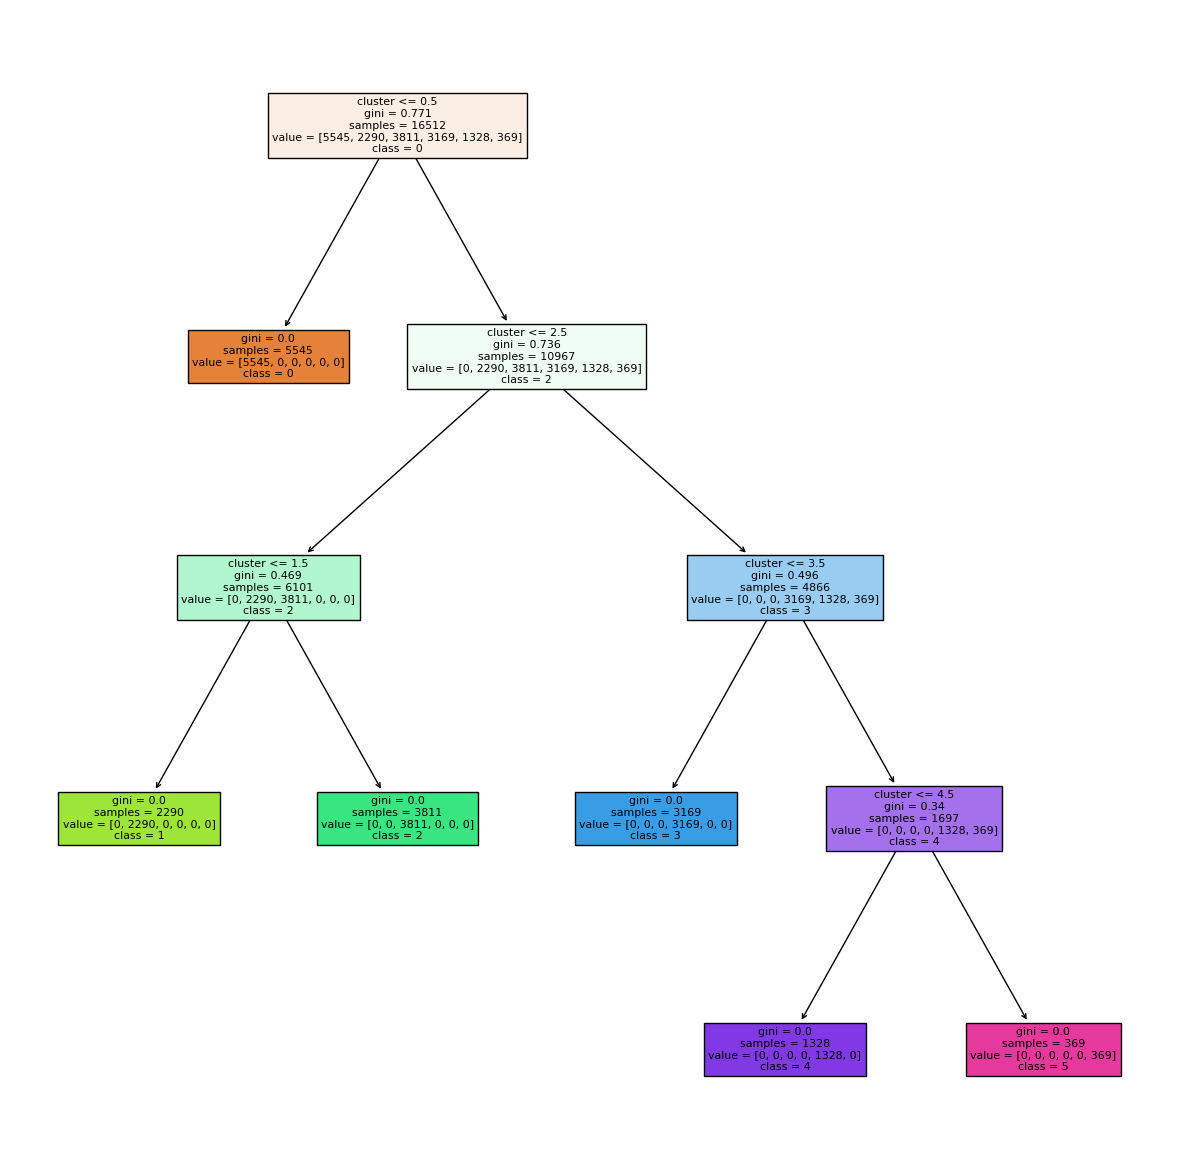

In [16]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [17]:
y_pred = model_sup.predict(X_test)
y_pred

array([2, 0, 0, ..., 2, 1, 1], dtype=int32)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [19]:
from pickle import dump

dump(model_unsup, open("k-means_default_42.sav", "wb"))
dump(model_sup, open("decision_tree_classifier_default_42.sav", "wb"))